### Import all the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
import time

from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


### Fetch the MNIST dataset from sklearn datasets module

In [2]:
data_set = datasets.fetch_openml("mnist_784", version=1, return_X_y = True)
pixel_values, targets = data_set

### Visualiszing the first digit

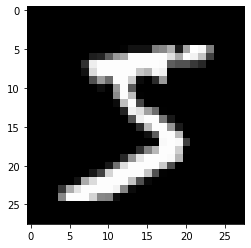

True Label associated with it = 5


In [3]:
#visualizing one single digit
single_digit = pixel_values[0,:].reshape(28,28)
plt.imshow(single_digit, cmap='gray')
plt.show()
#the corresponing true label
print("True Label associated with it =",targets[0])

### Preprocessing the dataset

In [4]:
#since targets are of string type, we convert them into integers
y_int = targets.astype(int)
#now converting to one hot encoded arrays
y = to_categorical(y_int)

#normalize  and convert type to float 32
x = (pixel_values/255)
print(x.shape)
print(y.shape)

(70000, 784)
(70000, 10)


### Splitting into training and testing data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

#reshaping
x_train = x_train.reshape(x_train.shape[0],28,28)
x_test = x_test.reshape(x_test.shape[0],28,28)

print("X train shape",x_train.shape)
print("Y train shape",y_train.shape)
print("X test shape",x_test.shape)
print("Y test shape",y_test.shape)

X train shape (63000, 28, 28)
Y train shape (63000, 10)
X test shape (7000, 28, 28)
Y test shape (7000, 10)


### Training

In [6]:
batch_size = 128
epochs = 15
num_classes = 10

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
443/443 [==============================] - 1s 3ms/step - loss: 0.8588 - accuracy: 0.8006 - val_loss: 0.3419 - val_accuracy: 0.9100
Epoch 2/15
443/443 [==============================] - 1s 3ms/step - loss: 0.2828 - accuracy: 0.9222 - val_loss: 0.2349 - val_accuracy: 0.9356
Epoch 3/15
443/443 [==============================] - 1s 3ms/step - loss: 0.2101 - accuracy: 0.9387 - val_loss: 0.1883 - val_accuracy: 0.9454
Epoch 4/15
443/443 [==============================] - 1s 3ms/step - loss: 0.1680 - accuracy: 0.9510 - val_loss: 0.1609 - val_accuracy: 0.9530
Epoch 5/15
443/443 [==============================] - 1s 3ms/step - loss: 0.1384 - accuracy: 0.9602 - val_loss: 0.1405 - val_accuracy: 0.9581
Epoch 6/15
443/443 [==============================] - 1s 3ms/step - loss: 0.1164 - accuracy: 0.9666 - val_loss: 0.1310 - val_accuracy: 0.9613
Epoch 7/15
443/443 [==============================] - 1s 3ms/step - loss: 0.0977 - accuracy: 0.9726 - val_loss: 0.1167 - val_accuracy: 0.9646
Epoch 

### Evaluate the trained model

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08572066575288773
Test accuracy: 0.9738571643829346
